# FastAPI
- 파이썬 웹서버 프레임워크
- Flask, Django도 존재하지만, FastAPI를 사용하는 이유
  - async 처리 별도 설정 없이 바로 사용 가능
- Swagger UI 제공합니다.

- git clone
  ```bash
  git clone https://github.com/KennethanCeyer/fastcampus-mlops.git
  ```
- `05. Neural Collaborative Filtering.ipynb`에서 모델 파일 `model.pth`를 얻습니다.
  - movie_recommendation_part1/app/src/model/artifacts/model.pth
- `05. Neural Collaborative Filtering.ipynb`에서 모델 동작한 스크립트 위치
  - /app/src/model/model.py
  - router.py에서 "/predict/" 관련 host를 받으면 동작하는 내용 구성
- 실행
  ```bash
  PYTHONPATH=$(pwd)/src python3 src/main.py
  ```
- Swagger 진입
  - `0.0.0.0:8000/docs`
  - Redoc : `0.0.0.0:8000/redoc`

### Docker
- dockerfile 수정
  ```docker
  FROM python:3.12-slim
   # FROM --platform=linux/amd64 python:3.12-slim
  
  WORKDIR /app
  COPY ./app /app
  ENV PYTHONPATH /app/src
  
  RUN pip install poetry
  RUN poetry config virtualenvs.create false \
      && poetry install --no-root --no-interaction --no-ansi
  
  CMD ["python3", "src/main.py"]
  ```
- build
  ```bash
  docker build . -t movie_recommendation_part_1
  ```
-run
  ```bash
  docker run -dit -p 8000:8000 --name movie_recommendation movie_recommendation_part_1
  ```

### AWS ECS
- AWS 콘솔 화면
   - 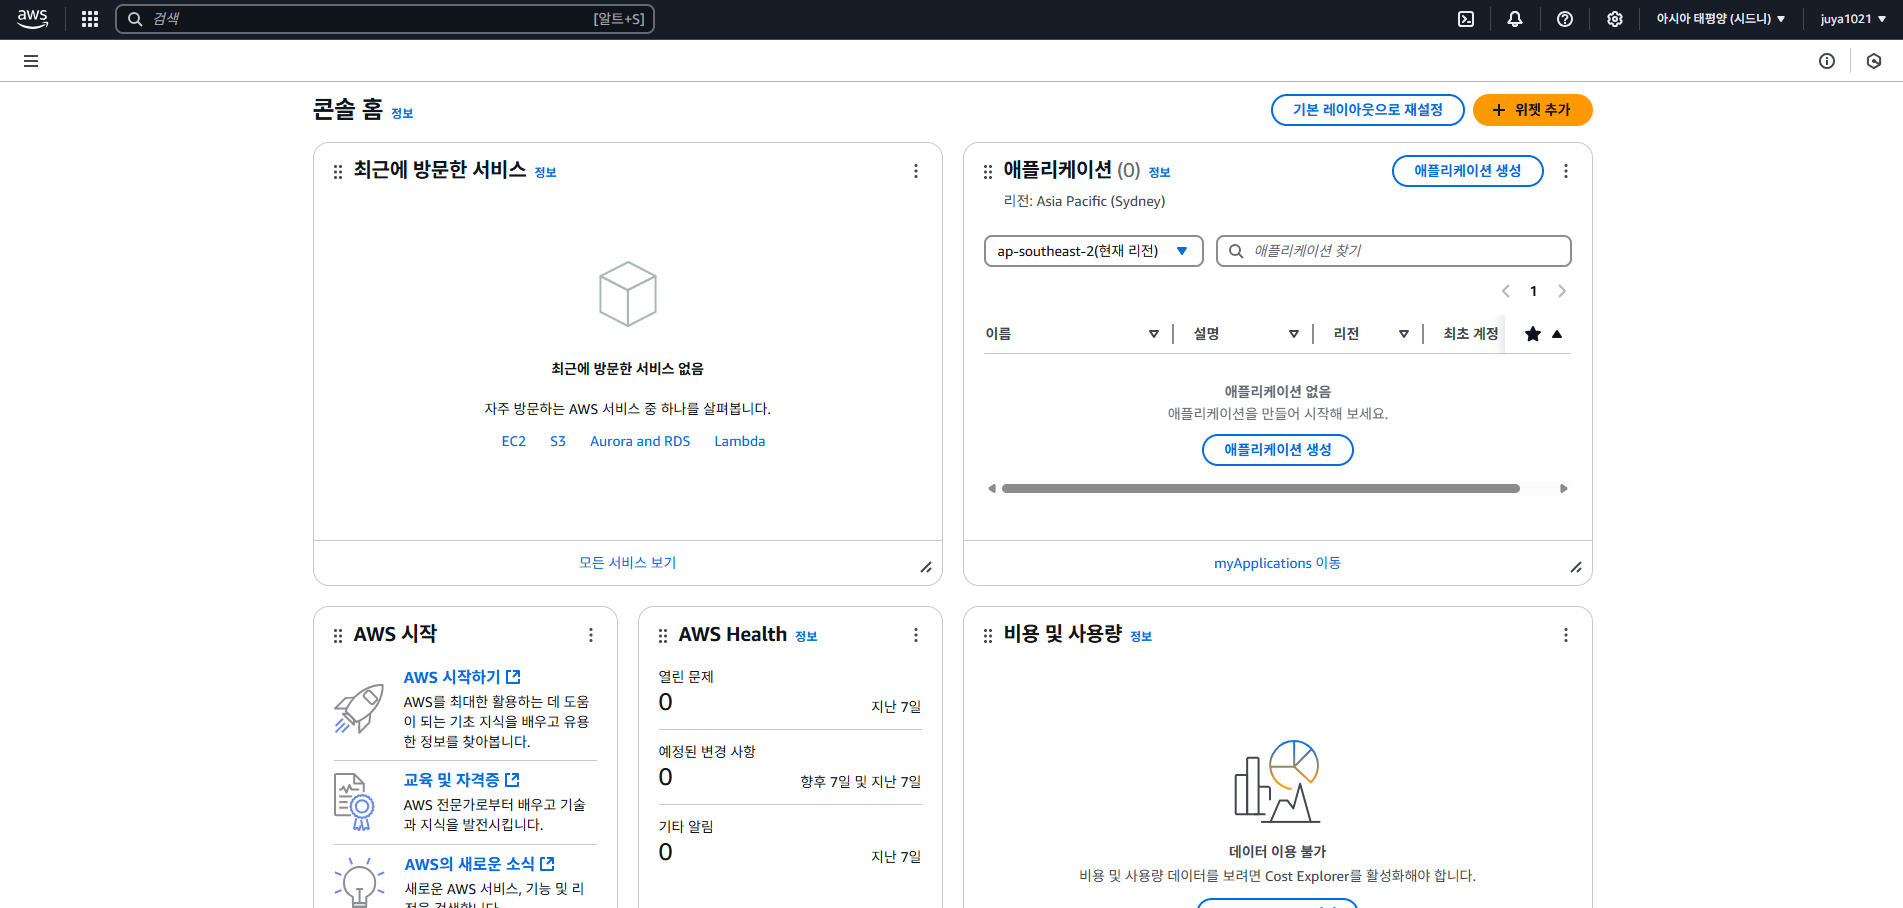
- 서울 설정
   - 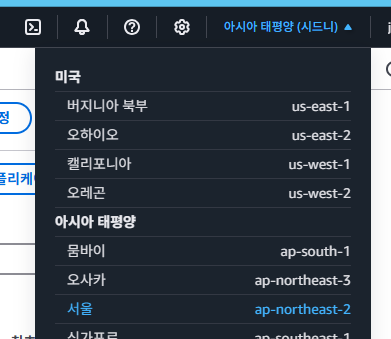
- 검색 -> `I AM` -> 사용자 추가
  - 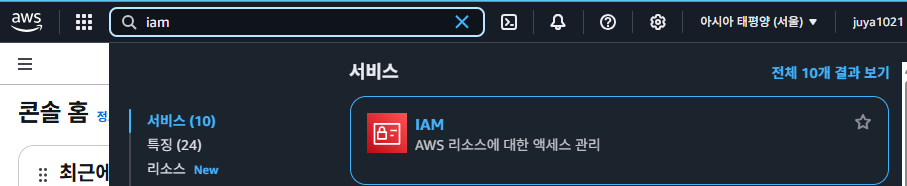
  - 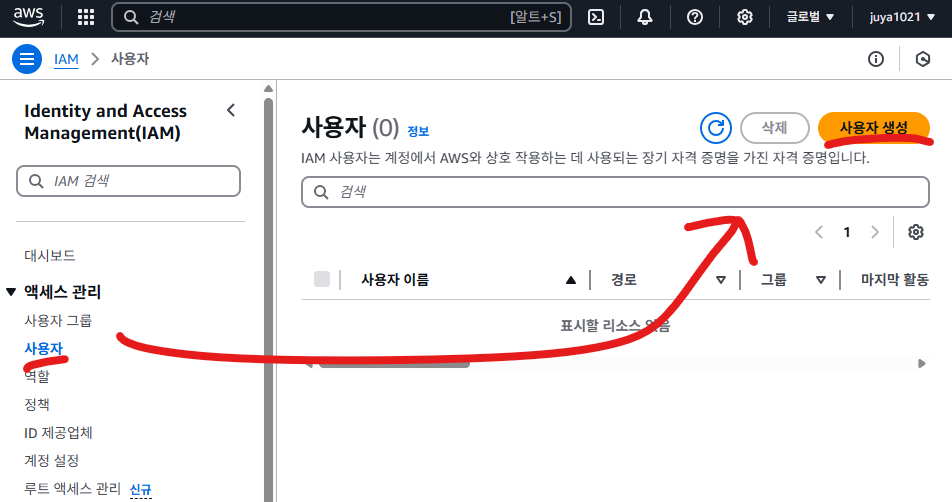
  - 정책 설정 (보통 권한복사 진행)
    - 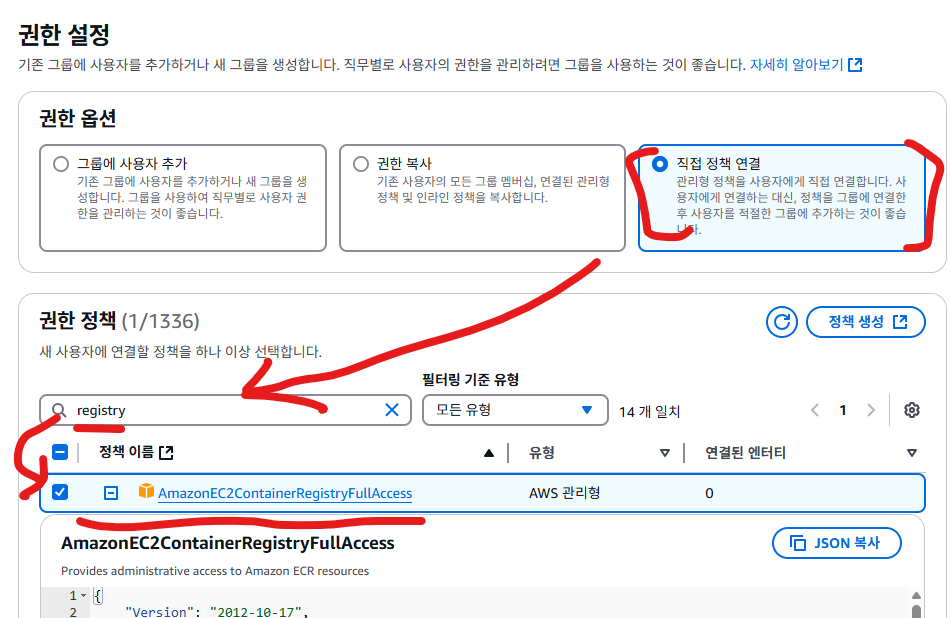
  - CLI 엑세스 키
    - 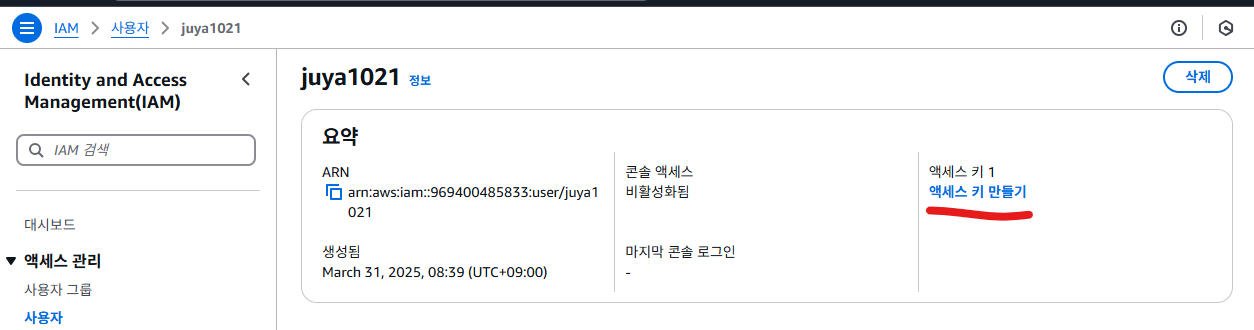
    - 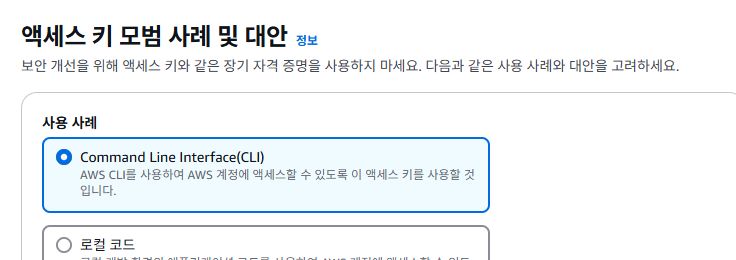
    - 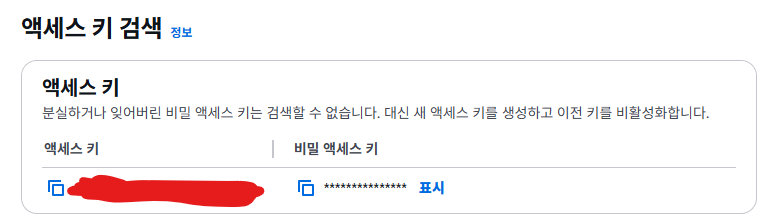
- [AWS CLI](https://aws.amazon.com/ko/cli/)
  - [AWS CLI Install](https://docs.aws.amazon.com/cli/latest/userguide/getting-started-install.html)
  - Local에서 aws cli 실행 가능
    - 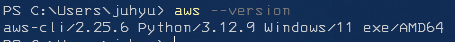
  - `aws configure`를 통해 Key 등록하여 사용
    - seoul의 region은 `ap-northeast-2`
    - default format : `json`
  - `./.aws/confing`, `./.aws/credentials`에서 설정 확인 가
- 검색 -> `ECR` -> 프라이빗 레지스트리
  - 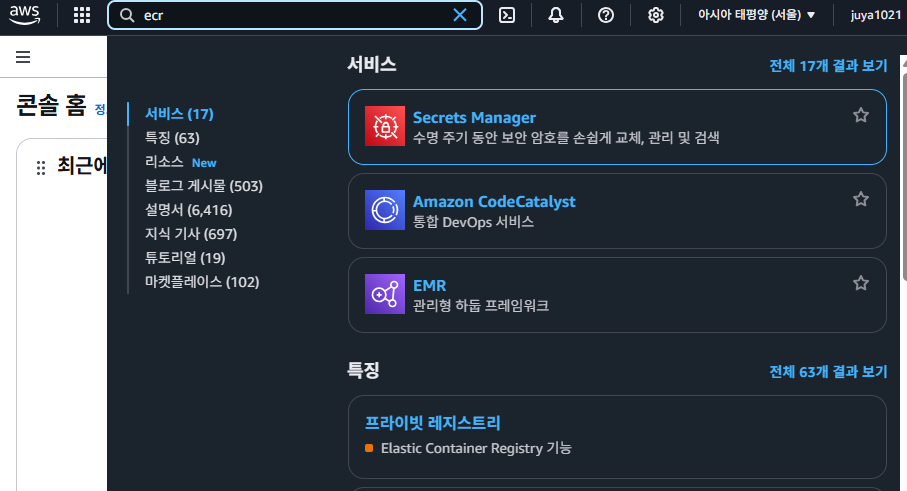
  - 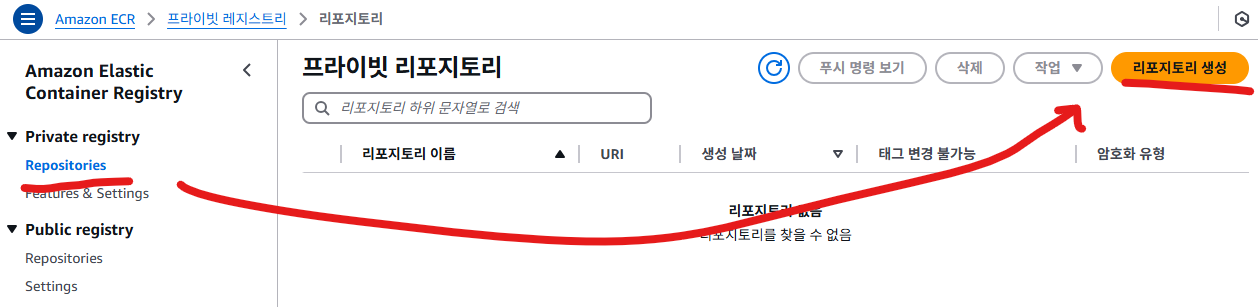
  - 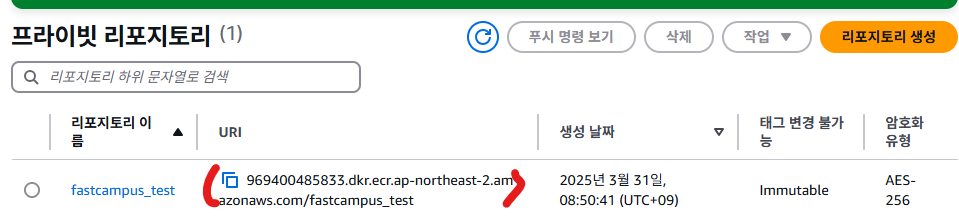
- aws cli로 repository 접근
  ```bash
  # docker 로그인 전용 키 발급
  # aws ecr get-login-password --region ap-northeast-2 --profile default
  # docker login --username AWS --password-stdin (URL)
  # EX )Powershell이 아닌 CMD에서 할 것
  aws ecr get-login-password --region ap-northeast-2 --profile default | docker login --username AWS --password-stdin 969400485833.dkr.ecr.ap-northeast-2.amazonaws.com/fastcampus_test
  ```
  - 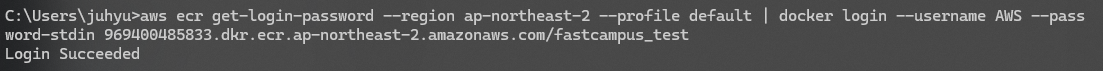
- aws erc registry에 docker push
  ```bash
  docker tag movie_recommendation_part_1 969400485833.dkr.ecr.ap-northeast-2.amazonaws.com/fastcampus_test:0.0.1
  docker push 969400485833.dkr.ecr.ap-northeast-2.amazonaws.com/fastcampus_test:0.0.1
  ```
  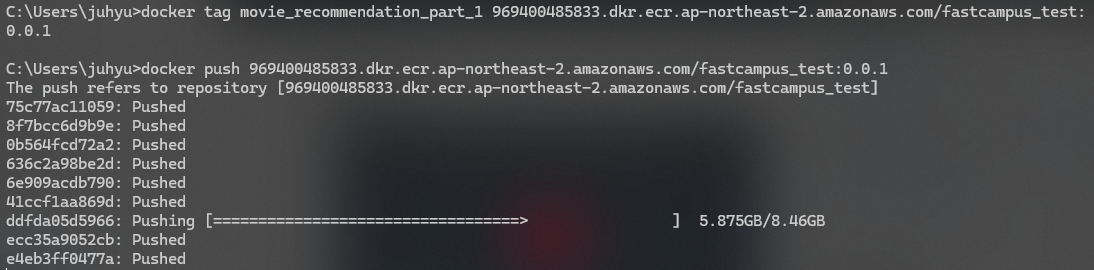
- Image 배포
  - 이미지 확인
    - 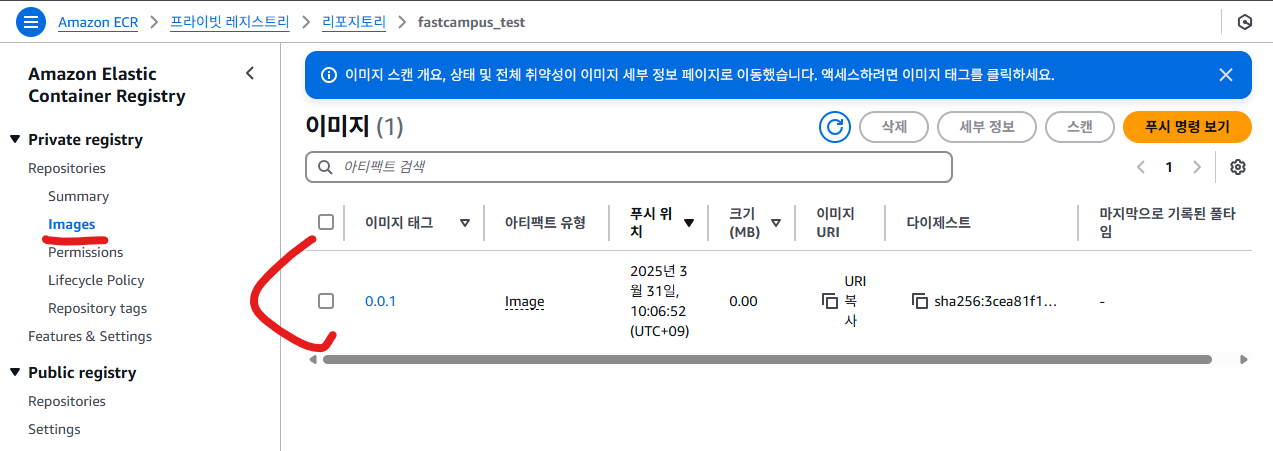
  - ECS > 클러스터 생성
    - 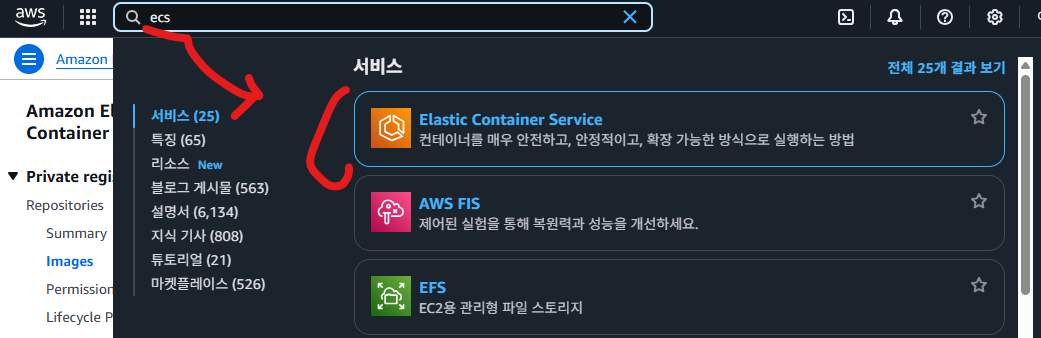
    - 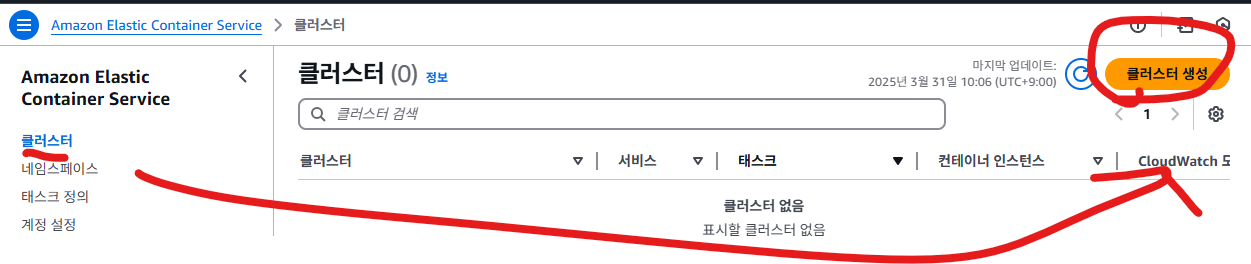
    - Aamazon EC2 인스턴스
    - 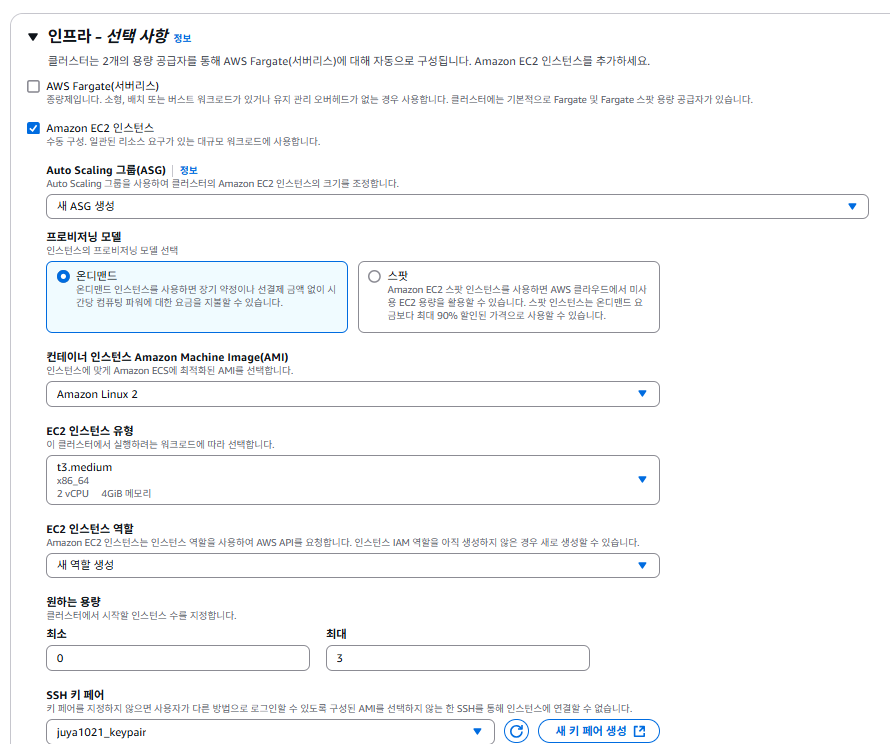
- VPC 확인
  - 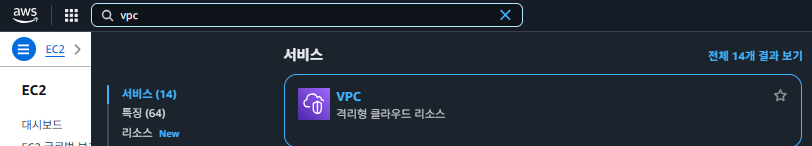
  - 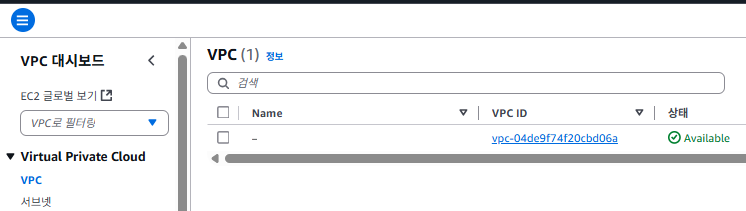
  - 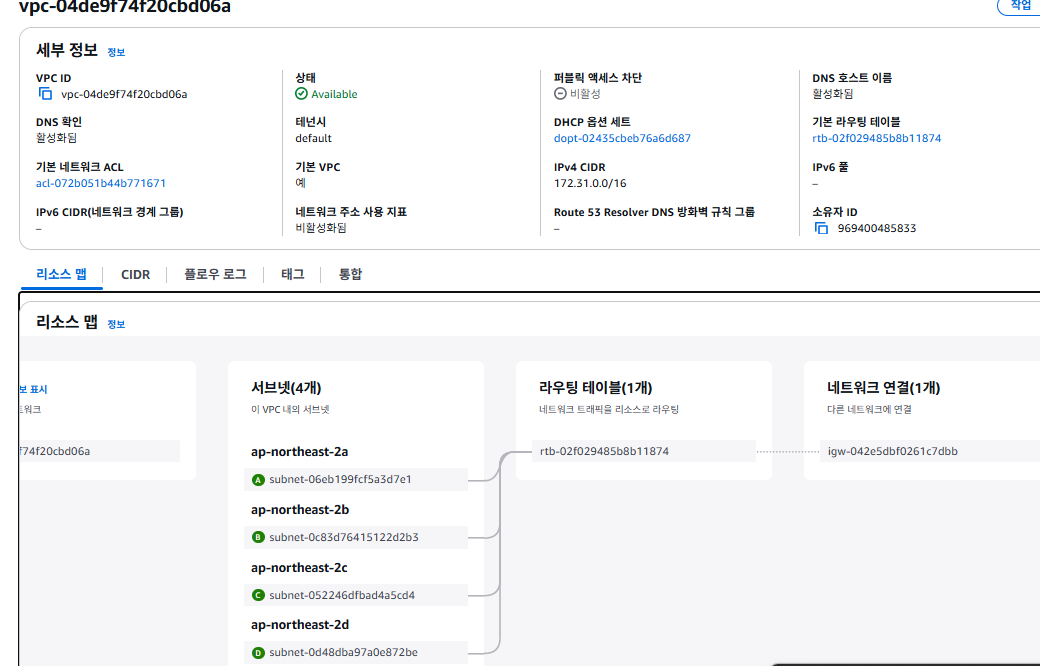
- aws cli 배포
  - 사용자 인라인 정책 생
    - 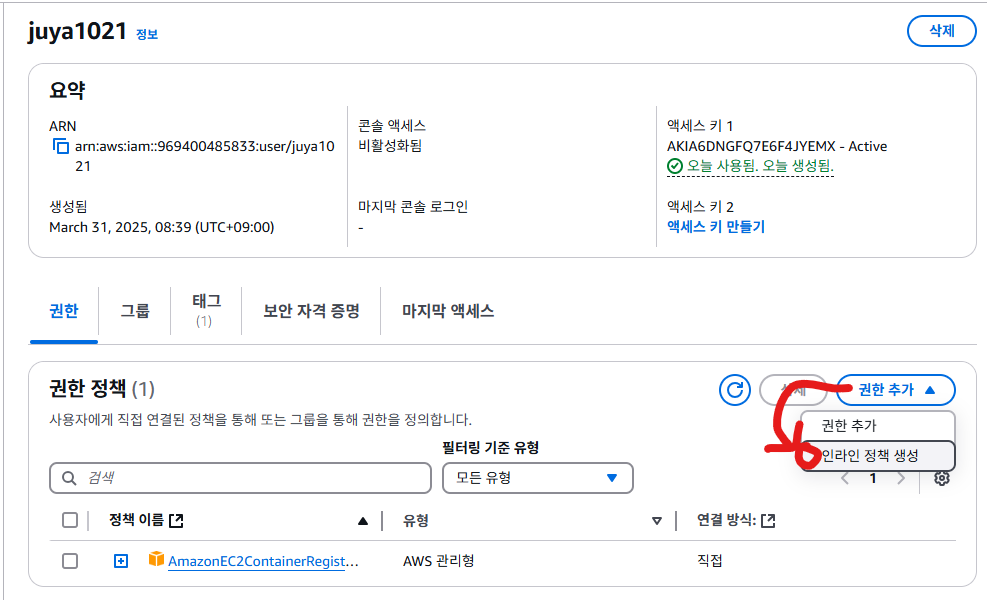
    - 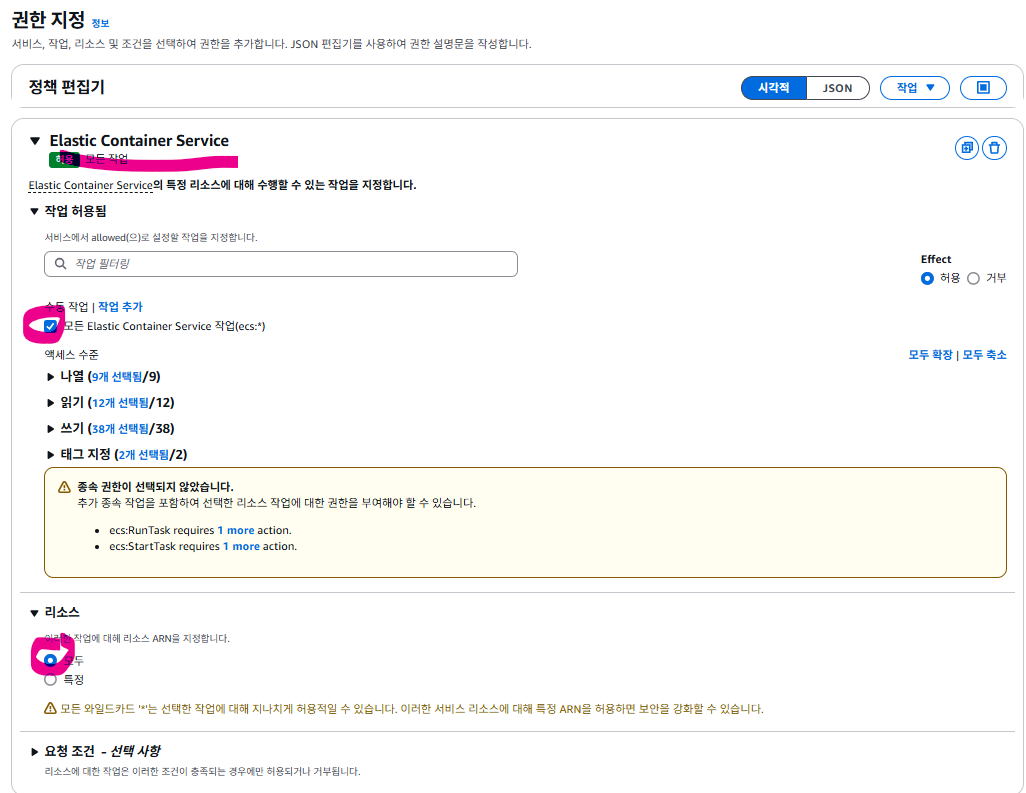
  - task-definitions.json 수정
    - movie_recommendation_part1/deploy/task-definition.json
```json
{
  "family": "fast-campus-task",
  "containerDefinitions": [
    {
      "name": "web",
      "image": "969400485833.dkr.ecr.ap-northeast-2.amazonaws.com/fastcampus_test:0.0.1",
      "essential": true,
      "memory": 500,
      "cpu": 10,
      "portMappings": [
        {
          "containerPort": 8000,
          "hostPort": 8000
        }
      ]
    }
  ]
}
```
  - task-definition.json 존재하는 폴더에 가서 다음 입력
  ```bash
  aws ecs register-task-definition --network-mode bridge --cli-input-json file://task-definition.json
  ```
  - ECS Cluster 서비스 생성
    - 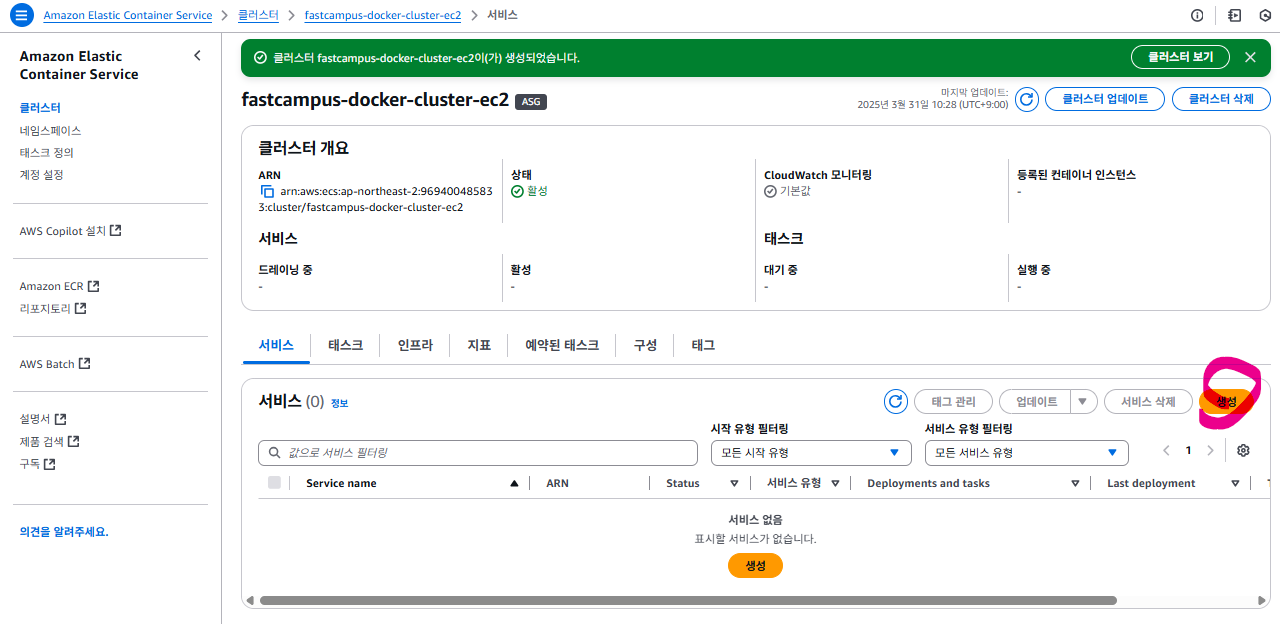
    - Task Family 생성 확인
    - 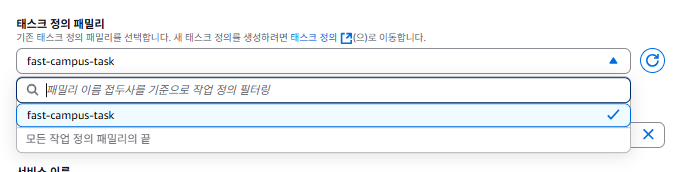
  - 서비스 실행
  ```bash
  aws ecs create-service --cluster fastcampus-docker-cluster-ec2 --service-name fast-campus-service --task-definition fast-campus-task --desired-count 1
  # 업데이트 하는 경우
  aws ecs update-service --cluster fastcampus-docker-cluster-ec2 --service fast-campus-service --task-definition fast-campus-task --desired-count 3
  ```
  - 서비스 확인
    - 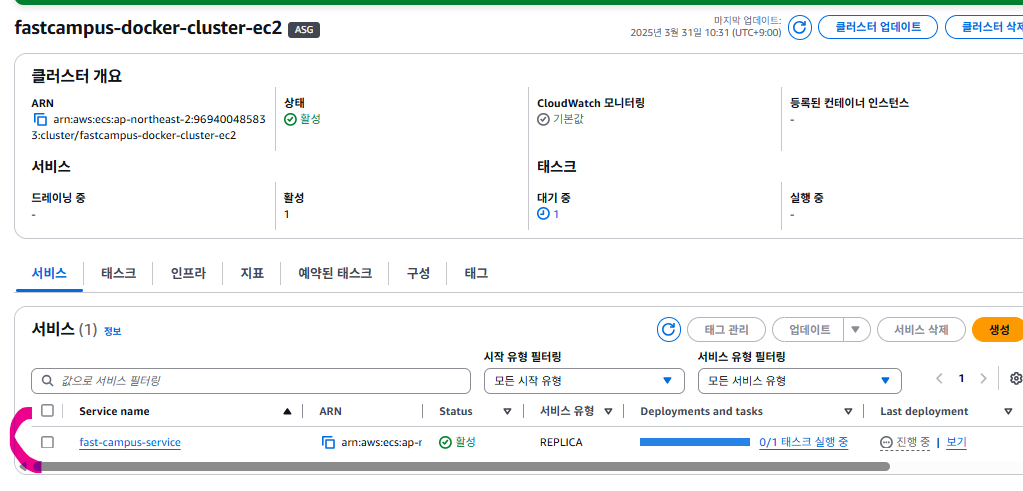
    - 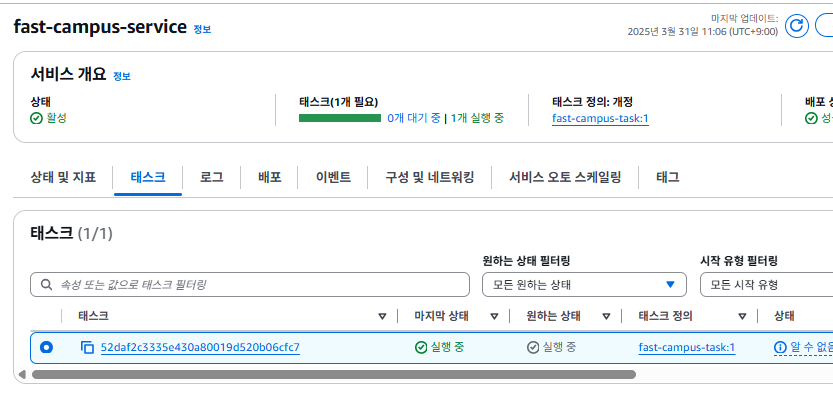
    - 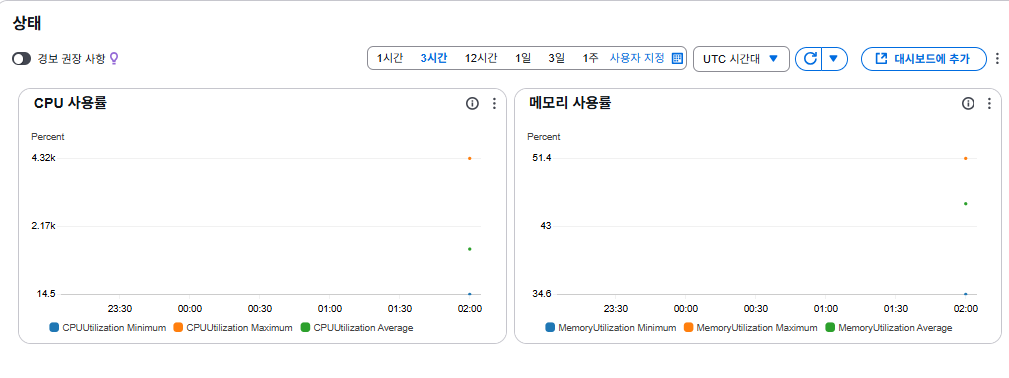
- 로드 밸런서 생성 -> Application Load Balancer -> 설정
  - 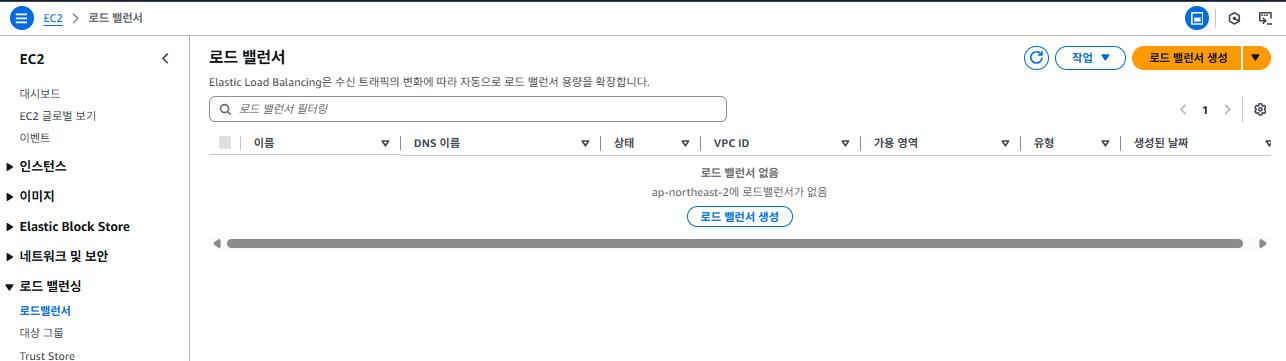
  - 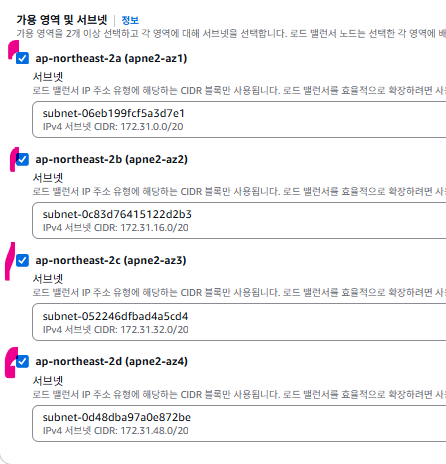
  - 대상 그룹은 인스턴스로 생성
    -  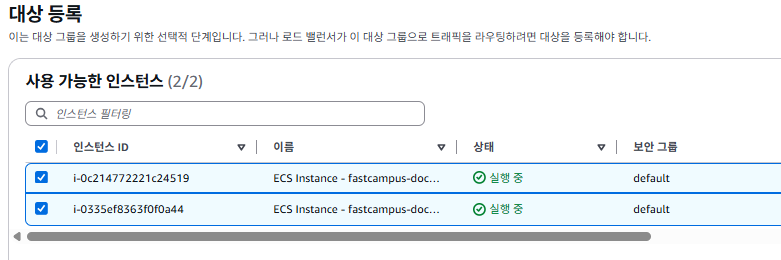
  - 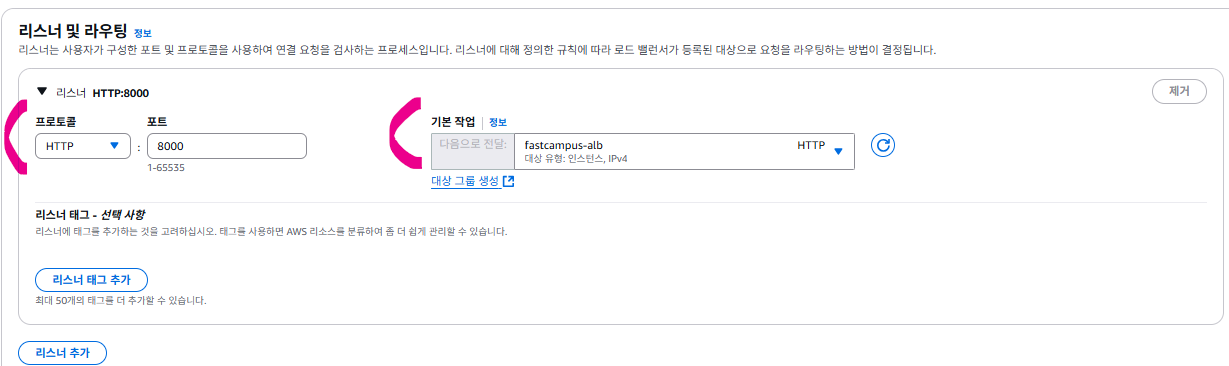

- 다음 세 방법 중 하나로 인스턴스 접근
  - ECS -> Cluster -> Service -> Task (실행중) -> 컨테이너 인스턴스 -> 인스턴스 ID -> 인스턴스 -> default 보안 -> 보안그룹 -> 인바운드 규칙 편집
  - EC2 -> 인스턴스 -> 실행중인 인스턴스 선택 -> default 보안 -> 보안그룹 -> 인바운드 규칙 편집
  - EC2 -> 보안그룹 -> 선택
- 보안 인바운드 규칙 추가
  - 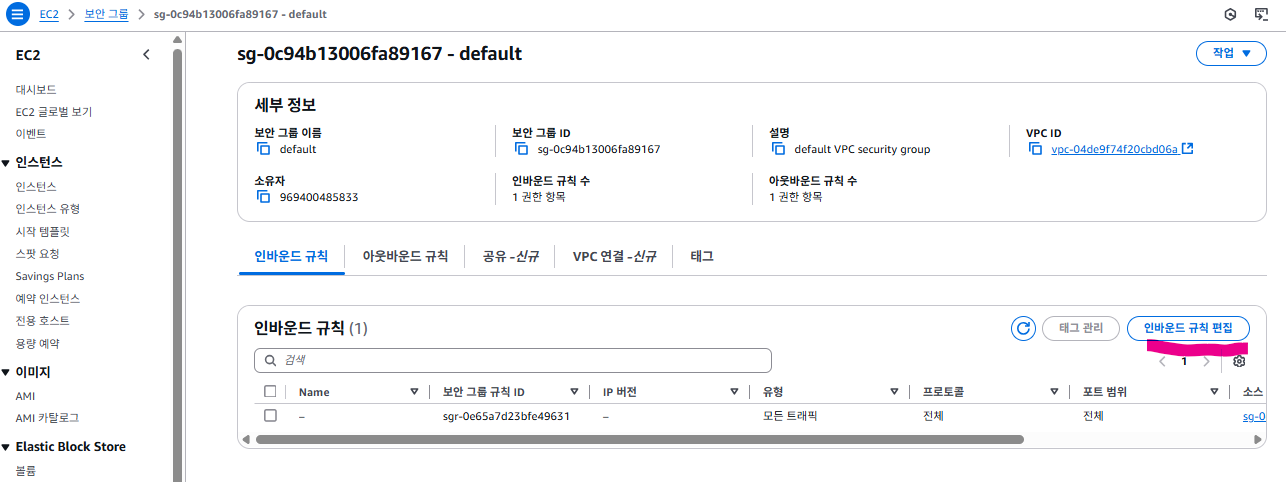
  - 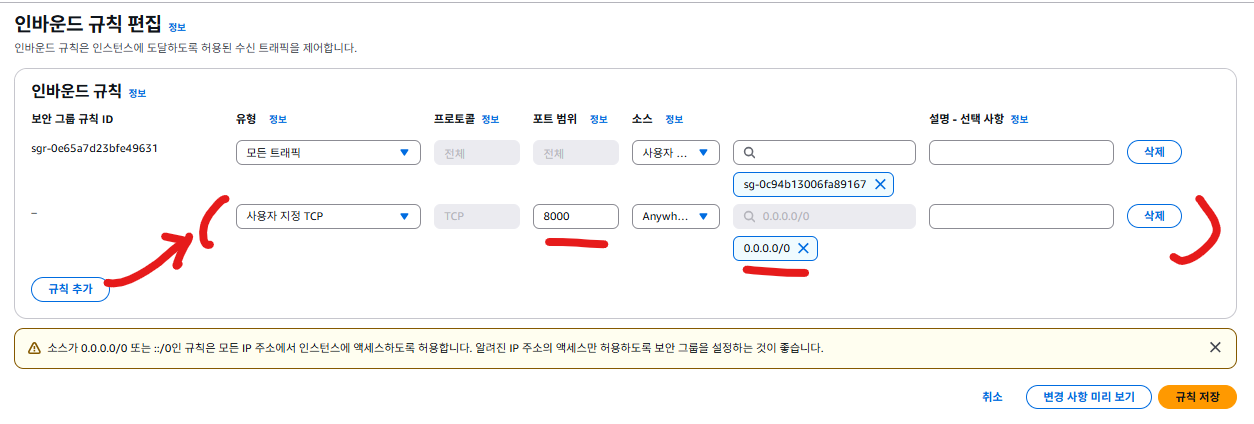
- 인스턴스의 Public DNS로 접근 가능
  - 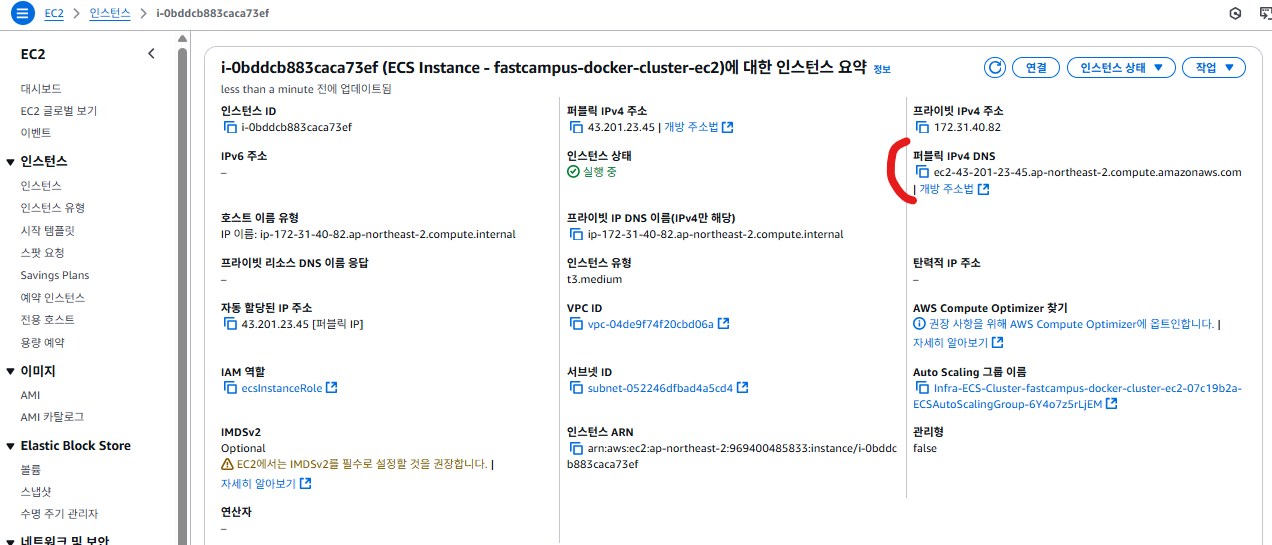
  - 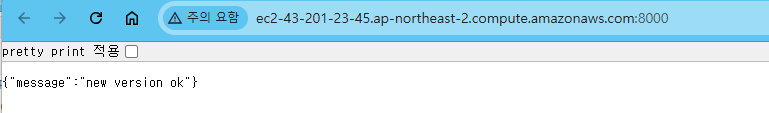
  - `http://ec2-43-201-23-45.ap-northeast-2.compute.amazonaws.com:8000/`